<a href="https://colab.research.google.com/github/Heshani99/Nexero_Module03/blob/main/Module03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive to access your data
drive.mount('/content/drive')


Mounted at /content/drive


### **Image Preprocessing**

Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

Load BoneXpertAHP Dataset

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/fyp/adultHeight.csv')

Display dataframe

In [ ]:
# Display the first few rows of the metadata
df.head()

,Sex,BoneAge,ChronologicalAge,CurrentHeight,AdultHeight
0,MALE,3.3,5.0,108.1,174.5
1,MALE,4.9,5.2,104.3,167.0
2,MALE,5.8,5.2,105.1,165.8
3,MALE,3.9,5.3,103.6,167.3
4,MALE,3.7,5.3,102.3,166.3


Get statistical summary of dataset

In [ ]:
df.describe()

,BoneAge,ChronologicalAge,CurrentHeight,AdultHeight
count,294.000000,294.000000,294.000000,294.000000
mean,12.887075,12.891837,143.632653,169.463946
std,4.608225,4.546544,19.911933,3.436085
min,2.900000,5.000000,100.700000,154.300000
25%,8.625000,8.600000,123.575000,166.900000
50%,13.250000,13.400000,149.750000,169.500000
75%,16.500000,16.600000,160.100000,172.100000
max,22.100000,21.000000,173.200000,175.500000


Check for missing data

In [ ]:
# Check for missing data
missing_data = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Data Count:")
print(missing_data)

Missing Data Count:
Sex                 0
BoneAge             0
ChronologicalAge    0
CurrentHeight       0
AdultHeight         0
BoneAgeMonths       0
dtype: int64


Create BoneAgeMonths Column

In [ ]:
# Convert 'BoneAge' from years to months
df['BoneAgeMonths'] = df['BoneAge'] * 12.


Split Data into features and target variable

In [ ]:
# Define features (X) and target variable (y)
X = df[['Sex','BoneAge', 'ChronologicalAge', 'CurrentHeight']]
y = df['AdultHeight']

df.head()


,Sex,BoneAge,ChronologicalAge,CurrentHeight,AdultHeight,BoneAgeMonths
0,MALE,3.3,5.0,108.1,174.5,39.6
1,MALE,4.9,5.2,104.3,167.0,58.8
2,MALE,5.8,5.2,105.1,165.8,69.6
3,MALE,3.9,5.3,103.6,167.3,46.8
4,MALE,3.7,5.3,102.3,166.3,44.4


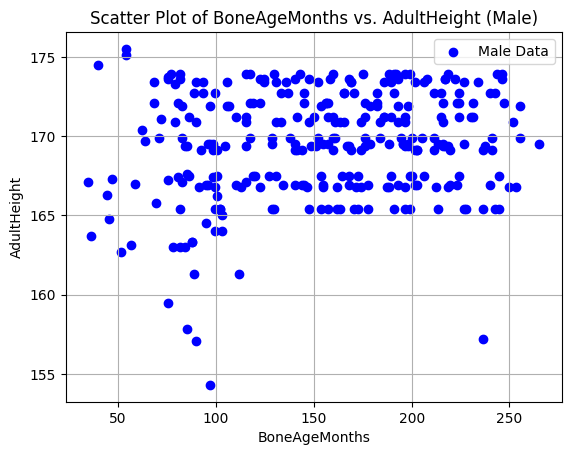

In [ ]:
male_data = df[df['Sex'] == 'MALE']

# Scatter plot for BoneAgeMonths vs. AdultHeight for males
plt.scatter(male_data['BoneAgeMonths'], male_data['AdultHeight'], label='Male Data', color='blue')

# Customize the plot
plt.title('Scatter Plot of BoneAgeMonths vs. AdultHeight (Male)')
plt.xlabel('BoneAgeMonths')
plt.ylabel('AdultHeight')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return filtered_data

# Specify the column containing potential outliers (e.g., 'AdultHeight')
column_with_outliers = 'AdultHeight'

# Combine X_train and y_train before removing outliers
training_data = pd.concat([X_train, pd.DataFrame(y_train, columns=['AdultHeight'])], axis=1)

# Remove outliers from the 'AdultHeight' column
training_data_no_outliers = remove_outliers_iqr(training_data, column_with_outliers)

# Separate X_train and y_train after removing outliers
X_train_no_outliers = training_data_no_outliers.drop('AdultHeight', axis=1)
y_train_no_outliers = training_data_no_outliers['AdultHeight']

# Display the shape before and after removing outliers
print(f'Shape before removing outliers: {training_data.shape}')
print(f'Shape after removing outliers: {training_data_no_outliers.shape}')



Shape before removing outliers: (235, 7)
Shape after removing outliers: (231, 7)


Split the data into traing and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


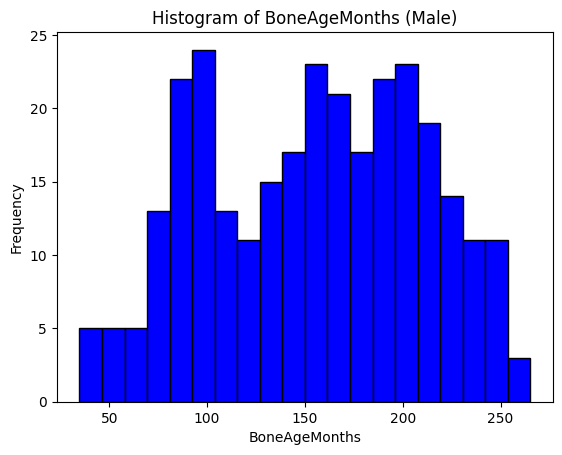

In [ ]:
# Histogram of BoneAgeMonths for males
plt.hist(male_data['BoneAgeMonths'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of BoneAgeMonths (Male)')
plt.xlabel('BoneAgeMonths')
plt.ylabel('Frequency')
plt.show()

## Implement the Bayley-Pineau Method

Basic Bayley-Pineau Method

In [ ]:
def bayley_pinneau_prediction(row):
    height = row['CurrentHeight']
    bone_age = row['BoneAge']
    sex = row['Sex']

    if sex == 'MALE':
        k = 1.51 - (0.08 * bone_age)
        b = 64.19 + (1.14 * height) - (0.03 * bone_age) - (0.03 * height * bone_age)
    elif sex == 'FEMALE':
        k = 1.43 - (0.07 * bone_age)
        b = 61.41 + (1.13 * height) - (0.01 * bone_age) - (0.01 * height * bone_age)
    else:
        print(f"Unexpected 'Sex' value: {sex}")
        return None

    return (k * height) + b

Apply the method to the training set

In [ ]:
# Apply the Bayley–Pineau method to the training set
X_train['PredictedHeight'] = X_train.apply(bayley_pinneau_prediction, axis=1)


# Example: Display the predicted heights for the training set
print(X_train[['BoneAgeMonths', 'CurrentHeight', 'Sex', 'PredictedHeight']])


     BoneAgeMonths  CurrentHeight   Sex  PredictedHeight
181          193.2          154.1  MALE         199.1609
209          186.0          165.5  MALE         220.1225
168          163.2          156.3  MALE         244.1522
6             75.6          107.1  MALE         273.5957
224          211.2          155.7  MALE         174.8318
..             ...            ...   ...              ...
188          177.6          161.5  MALE         228.7990
71           111.6          121.6  MALE         261.7542
106          124.8          141.8  MALE         277.4288
270          223.2          160.2  MALE         160.3928
102          115.2          138.1  MALE         284.0334

[235 rows x 4 columns]


Evaluate the Model on Training set

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model on the training set
mae_train = mean_absolute_error(y_train, X_train['PredictedHeight'])
mse_train = mean_squared_error(y_train, X_train['PredictedHeight'])
r2_train = r2_score(y_train, X_train['PredictedHeight'])

print(f'Training Set Metrics:')
print(f'Mean Absolute Error: {mae_train}')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')

# Apply the Bayley–Pineau method to the testing set
X_test['PredictedHeight'] = X_test.apply(bayley_pineau_prediction, axis=1)

# Evaluate the model on the testing set
mae_test = mean_absolute_error(y_test, X_test['PredictedHeight'])
mse_test = mean_squared_error(y_test, X_test['PredictedHeight'])
r2_test = r2_score(y_test, X_test['PredictedHeight'])

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error: {mae_test}')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')

In [ ]:
def bayley_pineau_prediction(row):
    # Separate equations for males (Sex=0) and females (Sex=1)
    if row['Sex'] == 'MALE':  # Male
        return 2.08 * row['BoneAge'] + 6.25 * row['CurrentHeight'] - 3.25 * row['ChronologicalAge'] + 62
    elif row['Sex'] == 'FEMALE':  # Female
        return 2.08 * row['BoneAge'] + 5.75 * row['CurrentHeight'] - 3.25 * row['ChronologicalAge'] + 64

# Apply the Bayley–Pineau method to the training set
X_train['PredictedHeight'] = X_train.apply(bayley_pineau_prediction, axis=1)

# Example: Display the predicted heights for the training set
print(X_train[['BoneAge', 'ChronologicalAge', 'CurrentHeight', 'Sex', 'PredictedHeight']])
